# Imports


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  ExtraTreesClassifier

# grid search
from sklearn.model_selection import RandomizedSearchCV

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
 

In [2]:
mentalhealth_df = pd.read_csv('survey.csv') #reading in CSV's from a file path

In [3]:
mentalhealth_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
mentalhealth_df.shape # to find out rows and columns of dataset

(1259, 27)

In [5]:
mentalhealth_df.describe() # to find out the distribution of the data

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [6]:
mentalhealth_df.info() # to find out what type of data is there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Data Cleaning


In [7]:
#dealing with missing data
#to get rid of the variables "Timestamp",“comments”, “state” as these attributes are either string values or date values
mentalhealth_df = mentalhealth_df.drop(['comments'], axis= 1)
mentalhealth_df = mentalhealth_df.drop(['state'], axis= 1)
mentalhealth_df = mentalhealth_df.drop(['Timestamp'], axis= 1)

In [8]:
mentalhealth_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [9]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

for feature in mentalhealth_df:
    if feature in intFeatures:
        mentalhealth_df[feature] = mentalhealth_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        mentalhealth_df[feature] = mentalhealth_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        mentalhealth_df[feature] = mentalhealth_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)

In [10]:
mentalhealth_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [11]:
gender = mentalhealth_df['Gender'].str.lower() #lower case all column's elements

gender = mentalhealth_df['Gender'].unique() #Select unique elements

# Making gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in mentalhealth_df.iterrows():

    if str.lower(col.Gender) in male_str:
        mentalhealth_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        mentalhealth_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        mentalhealth_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

# Removing invalid values
stk_list = ['A little about you', 'p']
mentalhealth_df = mentalhealth_df[~mentalhealth_df['Gender'].isin(stk_list)]

print(mentalhealth_df['Gender'].unique())

['female' 'male' 'trans']


In [12]:
# Replace missing age values with the median
mentalhealth_df['Age'] = mentalhealth_df['Age'].fillna(mentalhealth_df['Age'].median())

# Ensure we are modifying the original DataFrame properly
mentalhealth_df.loc[mentalhealth_df['Age'] < 18, 'Age'] = mentalhealth_df['Age'].median()
mentalhealth_df.loc[mentalhealth_df['Age'] > 120, 'Age'] = mentalhealth_df['Age'].median()

# Define Age Ranges
mentalhealth_df['age_range'] = pd.cut(
    mentalhealth_df['Age'], bins=[0, 20, 30, 65, 100], 
    labels=["0-20", "21-30", "31-65", "66-100"], 
    include_lowest=True
)

In [13]:
#There are almost negilgable amount of entries of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
mentalhealth_df['self_employed'] = mentalhealth_df['self_employed'].replace([defaultString], 'No')
print(mentalhealth_df['self_employed'].unique())

['No' 'Yes']


In [14]:
#There are only 0.2% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

mentalhealth_df['work_interfere'] = mentalhealth_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(mentalhealth_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


# EDA

In [15]:
labelDictionary = {}
for feature in mentalhealth_df:
    le = preprocessing.LabelEncoder()
    le.fit(mentalhealth_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    mentalhealth_df[feature] = le.transform(mentalhealth_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDictionary[labelKey] =labelValue
    
for key, value in labelDictionary.items():     
    print(key, value)

#Remove 'Country' attribute
mentalhealth_df = mentalhealth_df.drop(['Country'], axis= 1)
mentalhealth_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [16]:
mentalhealth_df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,8,1,0,0,1,0,2,0,1,1,...,2,1,1,1,1,1,1,0,0,1
1255,14,1,0,1,1,2,2,1,1,2,...,1,1,1,1,2,1,1,2,0,2
1256,16,1,0,1,1,4,5,0,1,2,...,1,2,2,0,0,1,1,1,0,2
1257,28,0,0,0,0,0,1,1,1,1,...,0,2,1,0,0,1,1,1,0,2


# Correlation Matrix

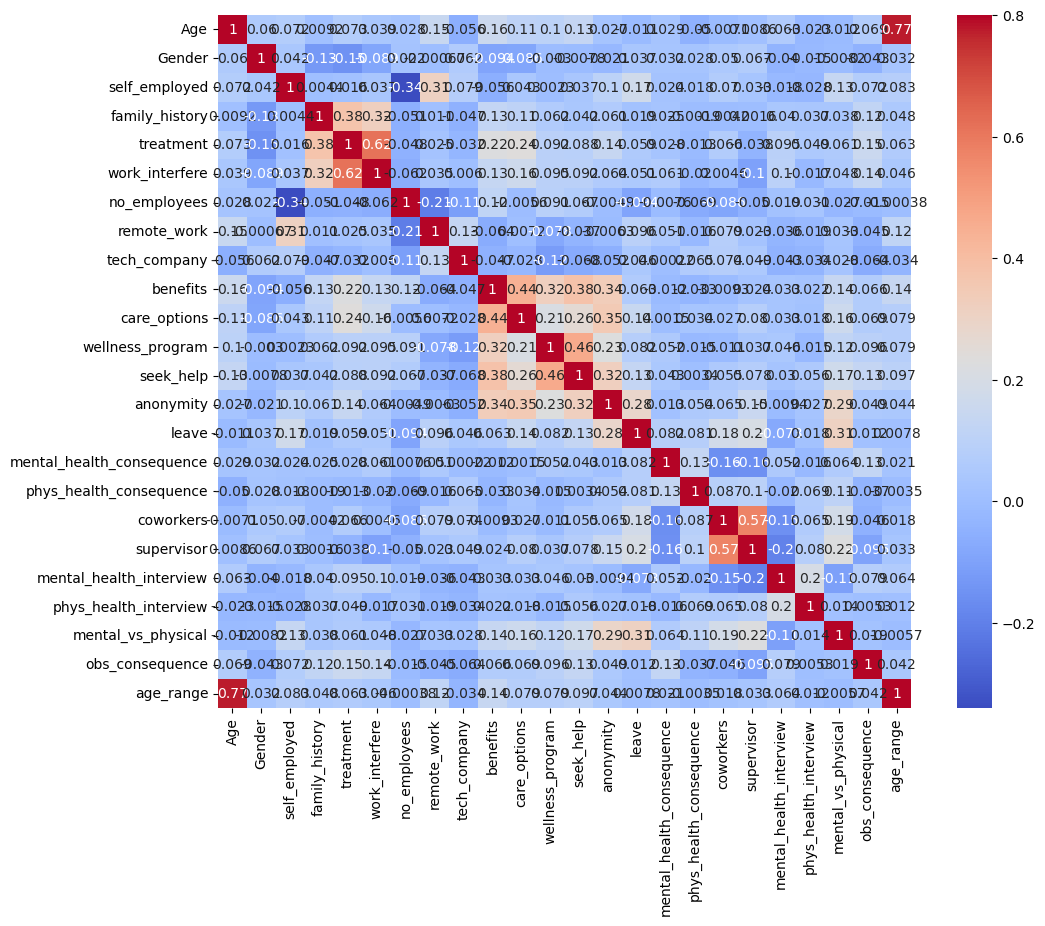

In [17]:
# Compute the correlation matrix
corrmat = mentalhealth_df.corr()

# Correct the argument name (use figsize instead of figheight)
f, ax = plt.subplots(figsize=(12, 9))

# Create a heatmap
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap="coolwarm")

# Display the plot
plt.show()

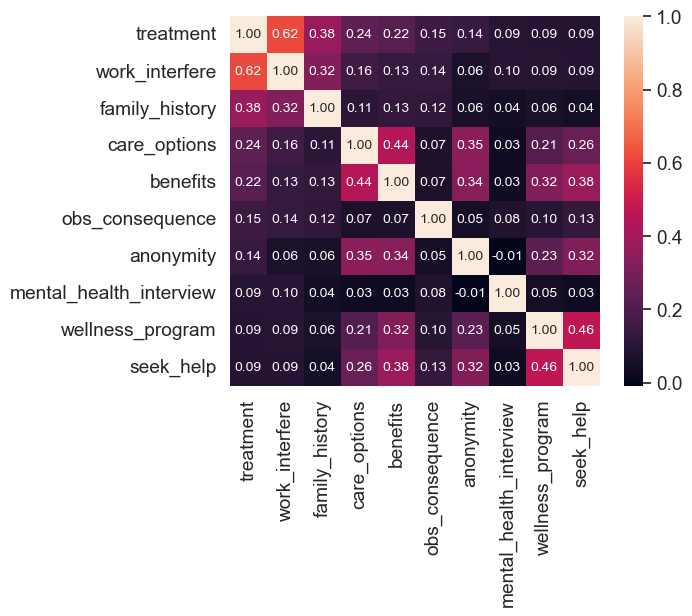

In [18]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(mentalhealth_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

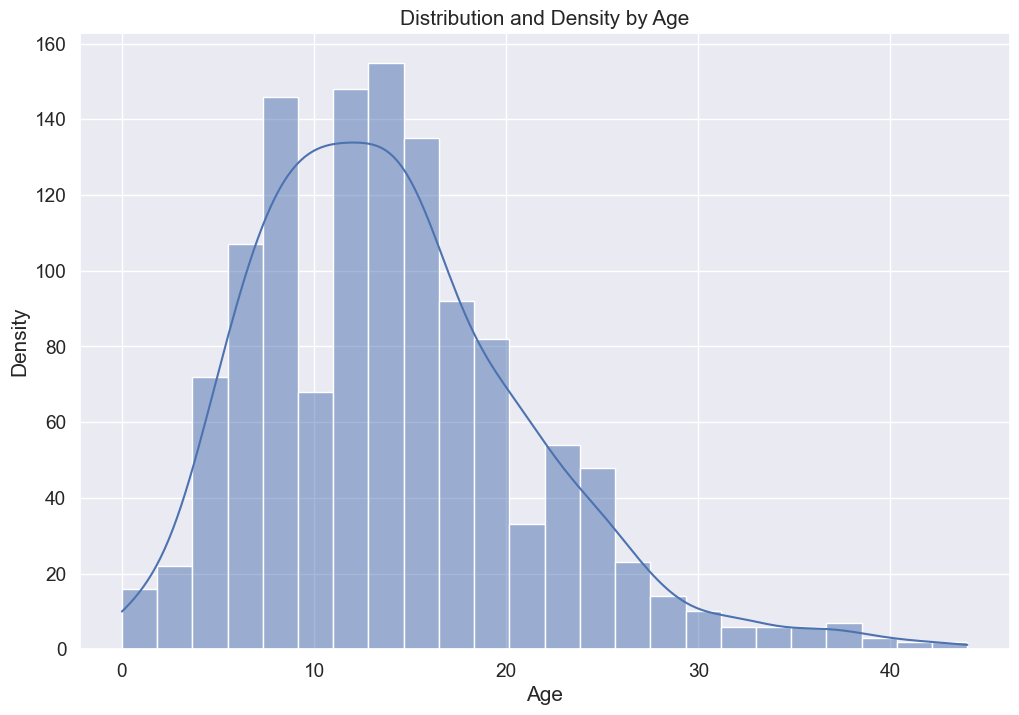

In [19]:
# Set the figure size correctly
plt.figure(figsize=(12, 8))  # Corrected `figsize` argument

# Use sns.histplot instead of sns.distplot (since distplot is deprecated)
sns.histplot(mentalhealth_df["Age"], bins=24, kde=True)

# Add titles and labels
plt.title("Distribution and Density by Age")
plt.xlabel("Age")
plt.ylabel("Density")

# Show the plot
plt.show()

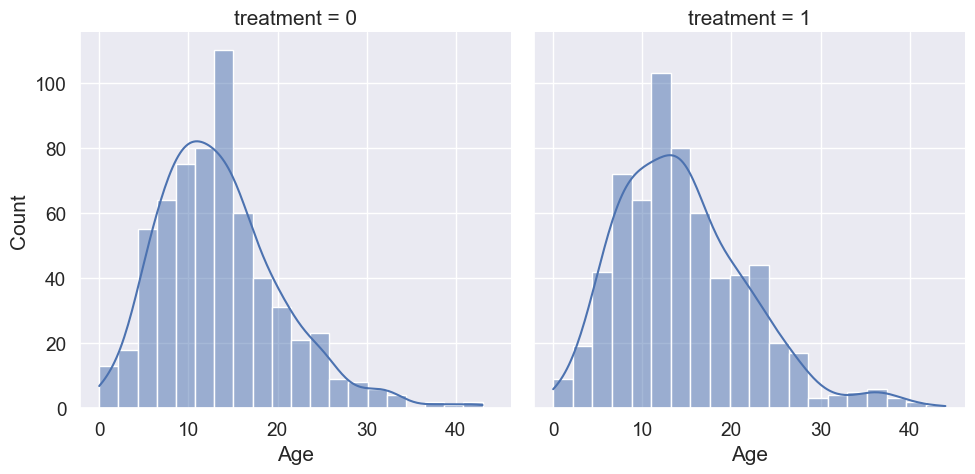

In [20]:
# Separate by treatment or not
g = sns.FacetGrid(mentalhealth_df, col='treatment', height=5)

# Use sns.histplot() instead of sns.distplot()
g.map(sns.histplot, "Age", bins=20, kde=True)

plt.show()

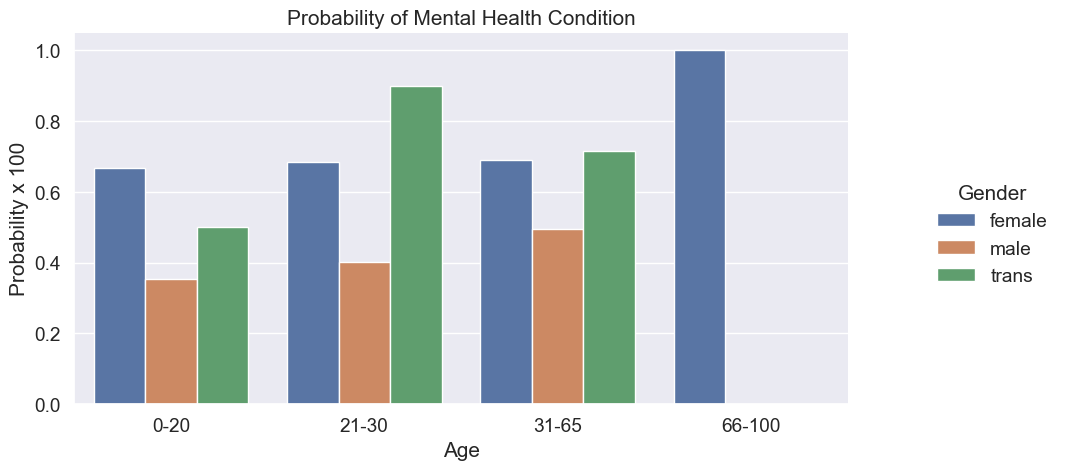

In [21]:
label_age = labelDictionary['label_age_range']

# Use errorbar=None instead of ci=None
g = sns.catplot(
    x="age_range", y="treatment", hue="Gender",
    data=mentalhealth_df, kind="bar",
    errorbar=None, height=5, aspect=2, legend_out=True
)

# Set custom tick labels
g.set_xticklabels(label_age)

# Set plot title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
new_labels = labelDictionary['label_Gender']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


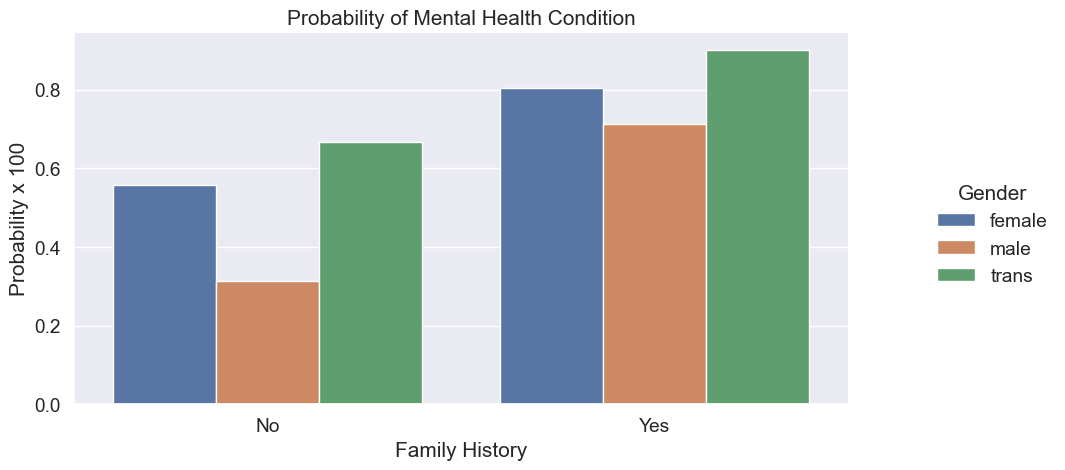

In [22]:
o = labelDictionary['label_family_history']

# Use errorbar=None instead of ci=None
g = sns.catplot(
    x="family_history", y="treatment", hue="Gender",
    data=mentalhealth_df, kind="bar",
    errorbar=None, height=5, aspect=2, legend_out=True
)

# Set custom tick labels
g.set_xticklabels(o)

# Set plot title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Replace legend labels
new_labels = labelDictionary['label_Gender']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


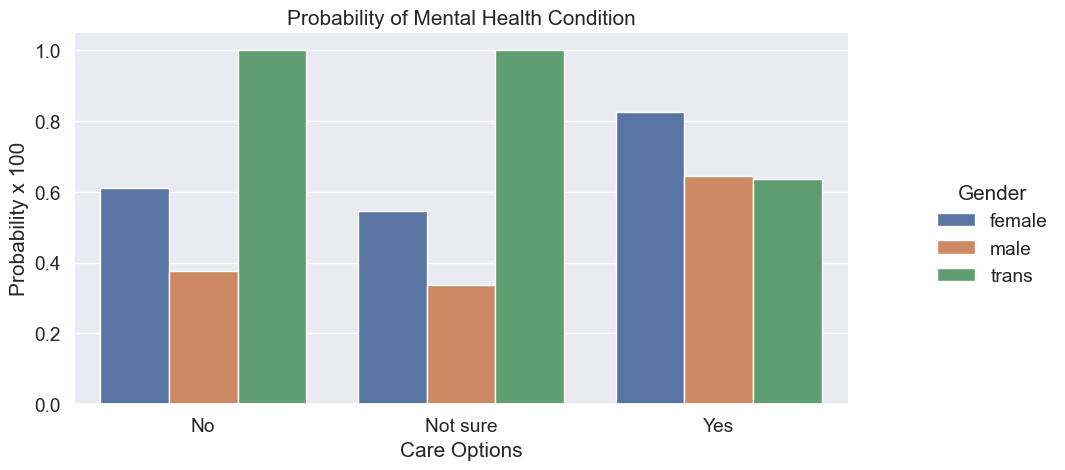

In [23]:
o = labelDictionary['label_care_options']

# Use errorbar=None instead of ci=None
g = sns.catplot(
    x="care_options", y="treatment", hue="Gender",
    data=mentalhealth_df, kind="bar",
    errorbar=None, height=5, aspect=2, legend_out=True
)

# Set custom tick labels
g.set_xticklabels(o)

# Set plot title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care Options')

# Replace legend labels
new_labels = labelDictionary['label_Gender']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

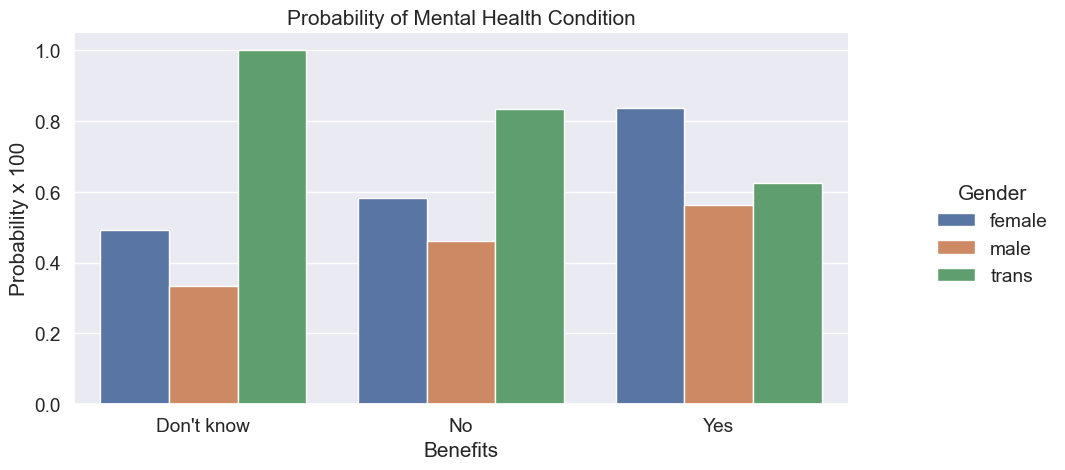

In [24]:
o = labelDictionary['label_benefits']

# Use errorbar=None instead of ci=None
g = sns.catplot(
    x="benefits", y="treatment", hue="Gender",  # Ensure x="benefits" is correct
    data=mentalhealth_df, kind="bar",
    errorbar=None, height=5, aspect=2, legend_out=True
)

# Set custom tick labels
g.set_xticklabels(o)

# Set plot title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# Replace legend labels
new_labels = labelDictionary['label_Gender']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

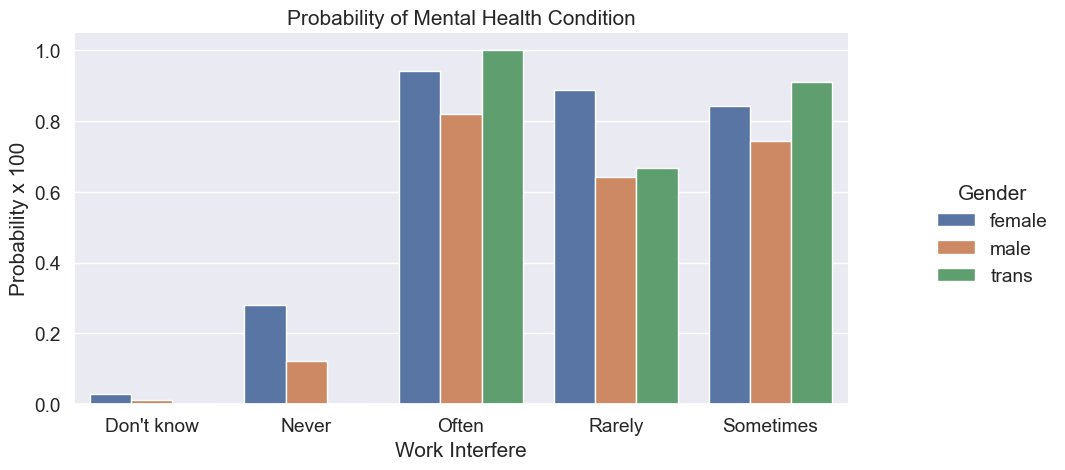

In [25]:
o = labelDictionary['label_work_interfere']

# Use errorbar=None instead of ci=None
g = sns.catplot(
    x="work_interfere", y="treatment", hue="Gender",
    data=mentalhealth_df, kind="bar",
    errorbar=None, height=5, aspect=2, legend_out=True
)

# Set custom tick labels
g.set_xticklabels(o)

# Set plot title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work Interfere')

# Replace legend labels
new_labels = labelDictionary['label_Gender']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

In [26]:
#Features Scaling We're going to scale age, because is extremely different from the other ones.
# Scaling Age
scaler = MinMaxScaler()
mentalhealth_df['Age'] = scaler.fit_transform(mentalhealth_df[['Age']])
mentalhealth_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


# Fitting

In [28]:
# Define feature columns and target variable
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = mentalhealth_df[feature_cols]
y = mentalhealth_df['treatment']  # Ensure y is correctly selected

# Split X and y into training and testing sets (corrected parameter name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
methodDictionary = {}

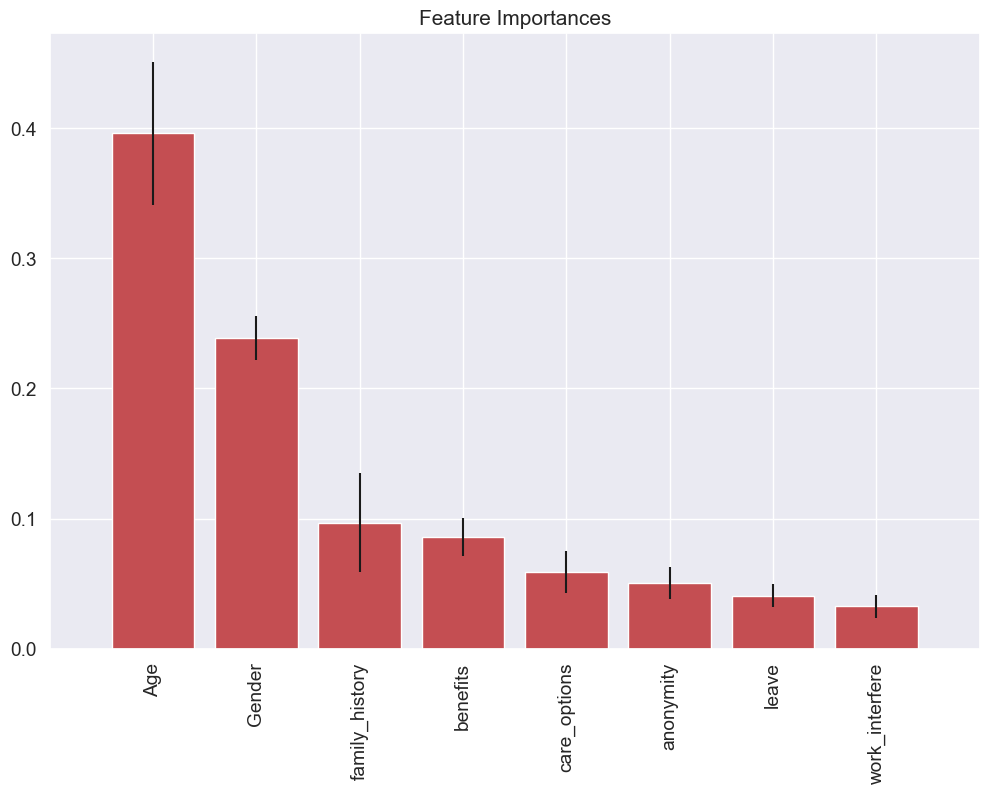

In [29]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

labels = [feature_cols[f] for f in range(X.shape[1])]

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))  # ✅ Fixed `figheight` issue

plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])

plt.show()

# Model Evaluation

In [30]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    
    #Classification accuracy: percentage of correct predictions
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))  # calculate accuracy
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    print('Null accuracy:\n', y_test.value_counts()) # examine the class distribution of the testing set (using a Pandas Series method)
    
    print('Percentage of ones:', y_test.mean()) # calculate the percentage of ones
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean()) # calculate the percentage of zeros
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    "----------------------------------------"
    #Adjusting the classification threshold
    "----------------------------------------"
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10]) # print the first 10 predicted probabilities of class membership

    
    model.predict_proba(X_test)[0:10, 1] # print the first 10 predicted probabilities for class 1
    
    
    y_pred_prob = model.predict_proba(X_test)[:, 1] # store the predicted probabilities for class 1
    
    if plot == True:
        # histogram of predicted probabilities
        
        plt.rcParams['font.size'] = 12 # adjust the font size 
        
        plt.hist(y_pred_prob, bins=8) # 8 bins
        
        
        plt.xlim(0,1) # x-axis limit from 0 to 1
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, threshold=0.3)
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    "------------------------------------------"
    #ROC Curves and Area Under the Curve (AUC)
    "------------------------------------------"
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    
    #fpr: false positive rate
    #tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    #IMPORTANT: first argument is true values, second argument is predicted probabilities 
    #we pass y_test and y_pred_prob
    #we do not use y_pred_class, because it will give incorrect results without generating an error
    #roc_curve returns 3 objects fpr, tpr, thresholds

    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    return accuracy

In [31]:
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [32]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [33]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

----------- Logistic Regression -------------
Accuracy: 0.7962962962962963
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


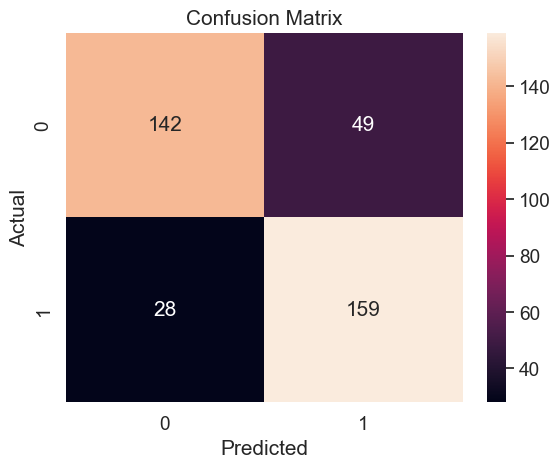

Classification Accuracy: 0.7962962962962963
Classification Error: 0.20370370370370372
False Positive Rate: 0.25654450261780104
Precision: 0.7644230769230769
AUC Score: 0.7968614385306716
Cross-validated AUC: 0.8753623882722146
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.09193053 0.90806947]
 [0.95991564 0.04008436]
 [0.96547467 0.03452533]
 [0.78757121 0.21242879]
 [0.38959922 0.61040078]
 [0.05264207 0.94735793]
 [0.75035574 0.24964426]
 [0.19065116 0.80934884]
 [0.61612081 0.38387919]
 [0.47699963 0.52300037]]
First 10 predicted probabilities:
 [[0.90806947]
 [0.04008436]
 [0.03452533]
 [0.21242879]
 [0.61040078]
 [0.94735793]
 [0.24964426]
 [0.80934884]
 [0.38387919]
 [0.52300037]]


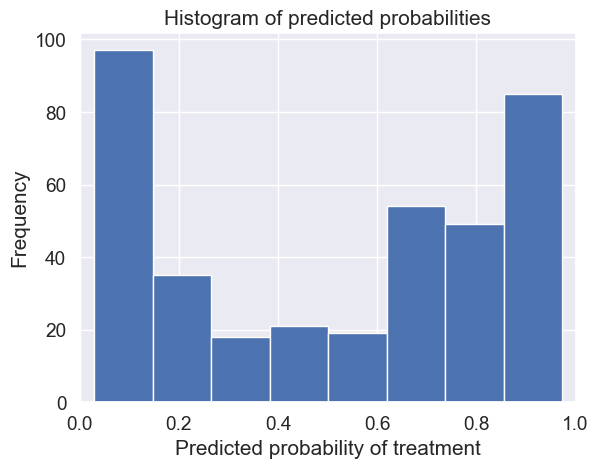

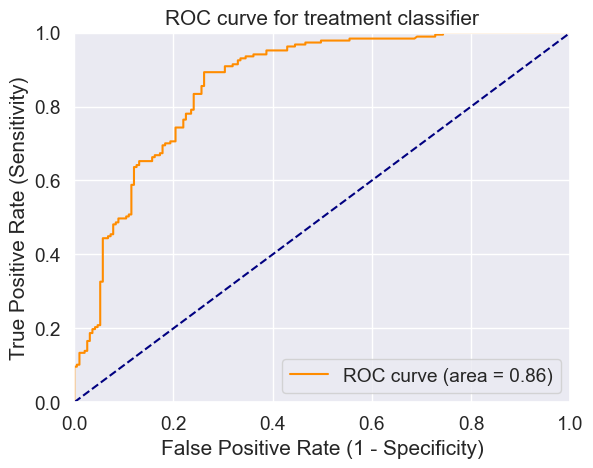

[[142  49]
 [ 28 159]]


In [34]:
def logisticRegression():
    # Train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('----------- Logistic Regression -------------')
    
    # Ensure evalClassModel() works correctly
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, plot=True)

    # Store accuracy score in dictionary
    methodDictionary['Log. Regres.'] = accuracy_score * 100

logisticRegression()

------------ KNeighborsClassifier ------------
Accuracy: 0.8042328042328042
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


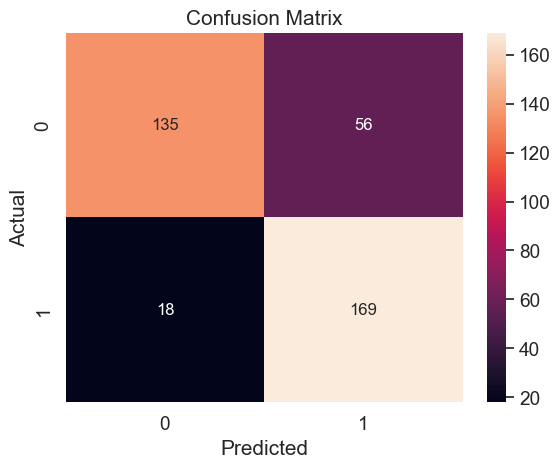

Classification Accuracy: 0.8042328042328042
Classification Error: 0.1957671957671958
False Positive Rate: 0.2931937172774869
Precision: 0.7511111111111111
AUC Score: 0.8052747991152673
Cross-validated AUC: 0.8784644661702792
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.37037037 0.62962963]
 [0.03703704 0.96296296]
 [0.59259259 0.40740741]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.62962963]
 [0.96296296]
 [0.40740741]
 [0.62962963]
 [0.66666667]
 [0.66666667]]


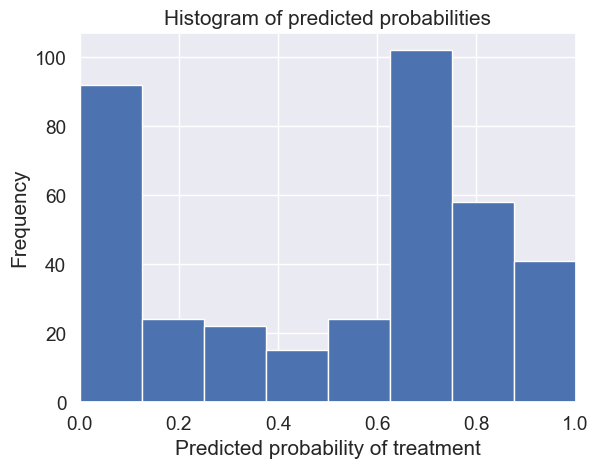

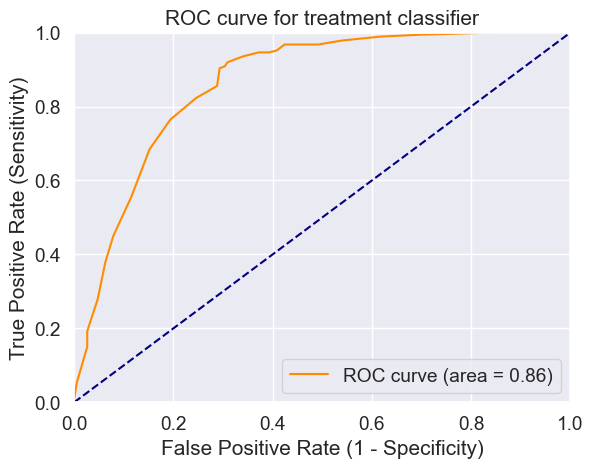

[[135  56]
 [ 18 169]]


In [35]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('------------ KNeighborsClassifier ------------')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDictionary['KNN'] = accuracy_score * 100
Knn()

------------ Tree classifier -------------
Accuracy: 0.8068783068783069
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


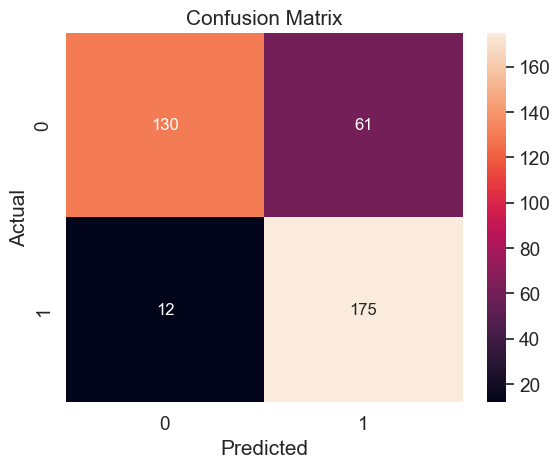

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.88552859129016
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.18823529 0.81176471]
 [0.95575221 0.04424779]
 [0.95575221 0.04424779]
 [0.95575221 0.04424779]
 [0.37583893 0.62416107]
 [0.05172414 0.94827586]
 [0.90384615 0.09615385]
 [0.37583893 0.62416107]
 [0.22018349 0.77981651]
 [0.22018349 0.77981651]]
First 10 predicted probabilities:
 [[0.81176471]
 [0.04424779]
 [0.04424779]
 [0.04424779]
 [0.62416107]
 [0.94827586]
 [0.09615385]
 [0.62416107]
 [0.77981651]
 [0.77981651]]


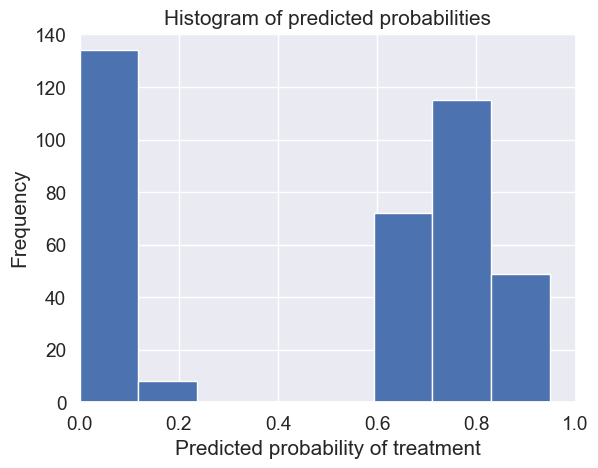

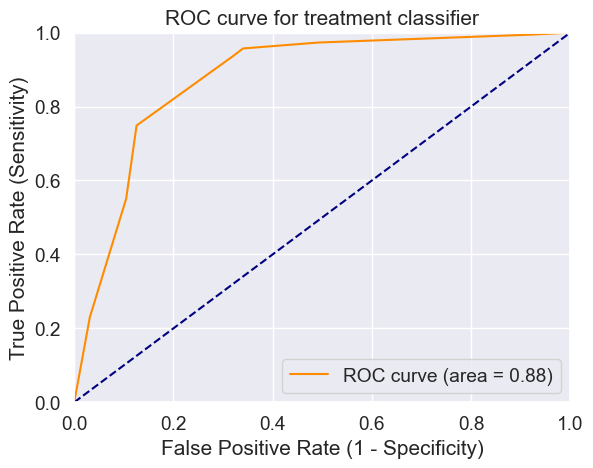

[[130  61]
 [ 12 175]]


In [36]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('------------ Tree classifier -------------')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDictionary['Tree clas.'] = accuracy_score * 100
    
treeClassifier()

------------ Random Forests ------------
Accuracy: 0.8121693121693122
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


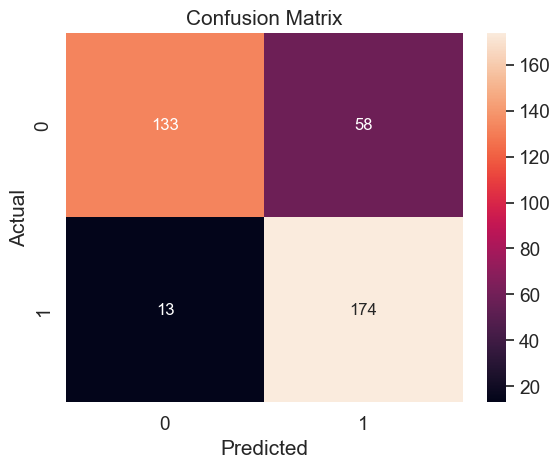

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.3036649214659686
Precision: 0.75
AUC Score: 0.8134081809782457
Cross-validated AUC: 0.8934280651104528
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2555794  0.7444206 ]
 [0.95069083 0.04930917]
 [0.93851009 0.06148991]
 [0.87096597 0.12903403]
 [0.40653554 0.59346446]
 [0.17282958 0.82717042]
 [0.89450448 0.10549552]
 [0.4065912  0.5934088 ]
 [0.20540631 0.79459369]
 [0.19337644 0.80662356]]
First 10 predicted probabilities:
 [[0.7444206 ]
 [0.04930917]
 [0.06148991]
 [0.12903403]
 [0.59346446]
 [0.82717042]
 [0.10549552]
 [0.5934088 ]
 [0.79459369]
 [0.80662356]]


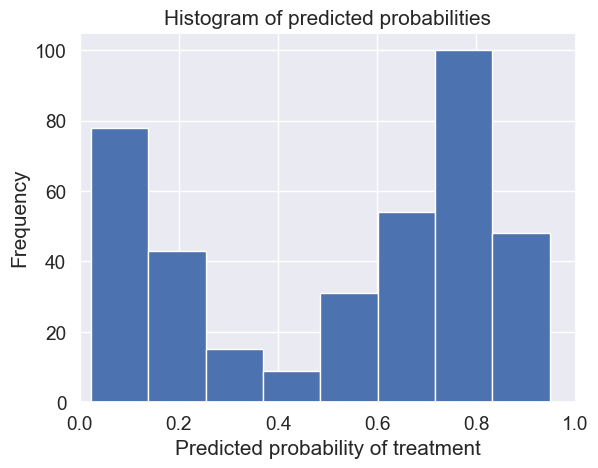

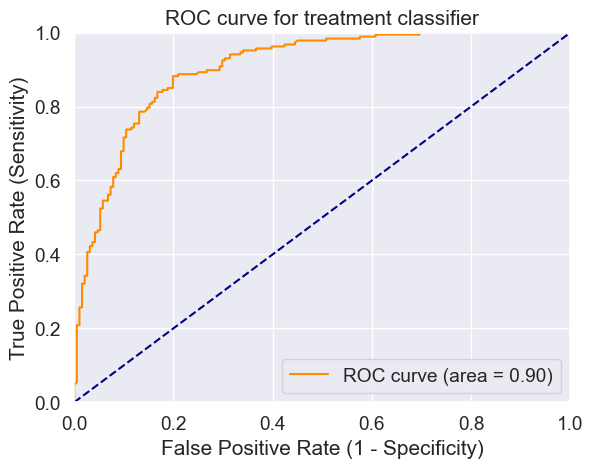

[[133  58]
 [ 13 174]]


In [37]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('------------ Random Forests ------------')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDictionary['R. Forest'] = accuracy_score * 100
randomForest()

-------------- Bagging -------------
Accuracy: 0.7804232804232805
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0]


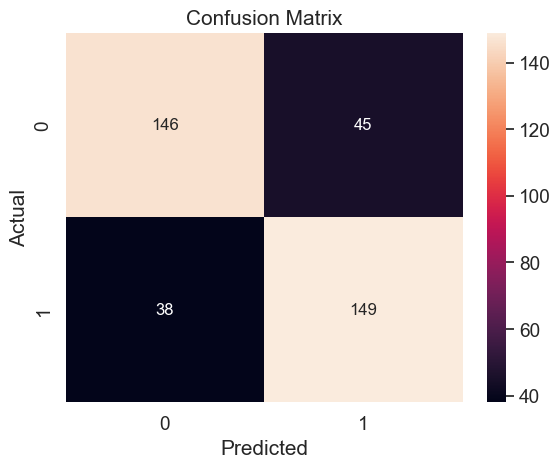

Classification Accuracy: 0.7804232804232805
Classification Error: 0.21957671957671954
False Positive Rate: 0.2356020942408377
Precision: 0.7680412371134021
AUC Score: 0.7805946748047149
Cross-validated AUC: 0.8414189746238998
First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.45 0.55]
 [1.   0.  ]
 [1.   0.  ]
 [0.6  0.4 ]
 [0.8  0.2 ]
 [0.4  0.6 ]
 [0.9  0.1 ]
 [0.6  0.4 ]
 [0.1  0.9 ]
 [0.3  0.7 ]]
First 10 predicted probabilities:
 [[0.55]
 [0.  ]
 [0.  ]
 [0.4 ]
 [0.2 ]
 [0.6 ]
 [0.1 ]
 [0.4 ]
 [0.9 ]
 [0.7 ]]


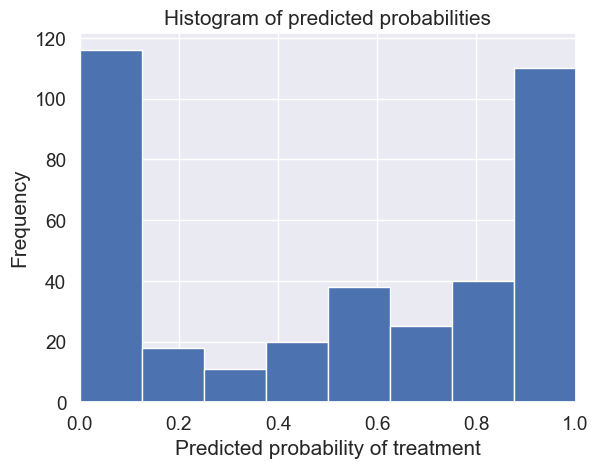

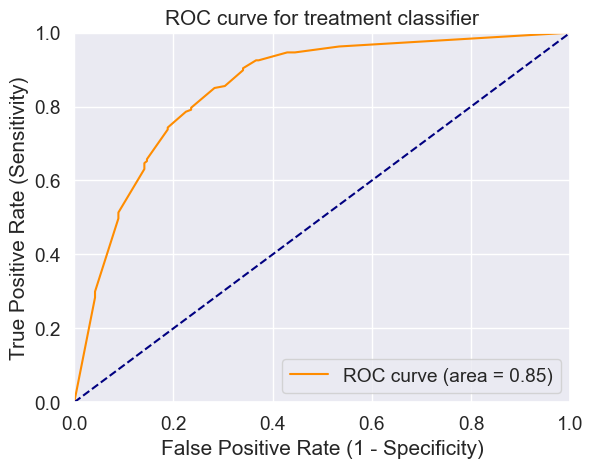

[[146  45]
 [ 38 149]]


In [38]:
def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('-------------- Bagging -------------')
    
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDictionary['Bagging'] = accuracy_score * 100
bagging()

-------------- Boosting -----------------
Accuracy: 0.8095238095238095
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


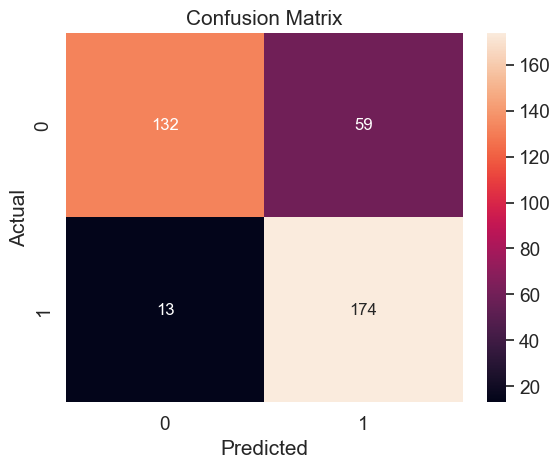

Classification Accuracy: 0.8095238095238095
Classification Error: 0.19047619047619047
False Positive Rate: 0.3089005235602094
Precision: 0.7467811158798283
AUC Score: 0.8107903799311253
Cross-validated AUC: 0.896802760456034
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.46729965 0.53270035]
 [0.62762704 0.37237296]
 [0.62681266 0.37318734]
 [0.54646283 0.45353717]
 [0.49670887 0.50329113]
 [0.43563885 0.56436115]
 [0.5297021  0.4702979 ]
 [0.48038984 0.51961016]
 [0.46683154 0.53316846]
 [0.45015399 0.54984601]]
First 10 predicted probabilities:
 [[0.53270035]
 [0.37237296]
 [0.37318734]
 [0.45353717]
 [0.50329113]
 [0.56436115]
 [0.4702979 ]
 [0.51961016]
 [0.53316846]
 [0.54984601]]


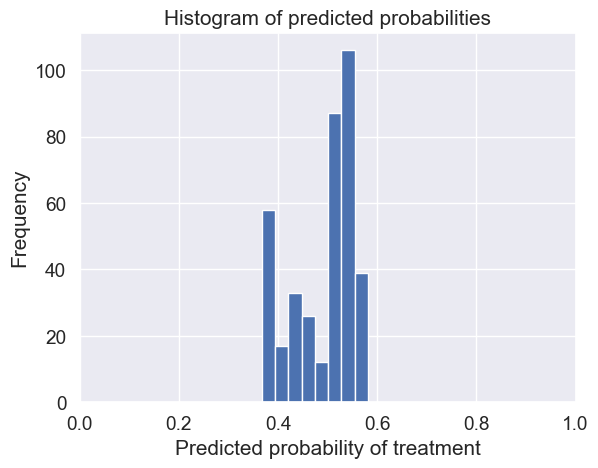

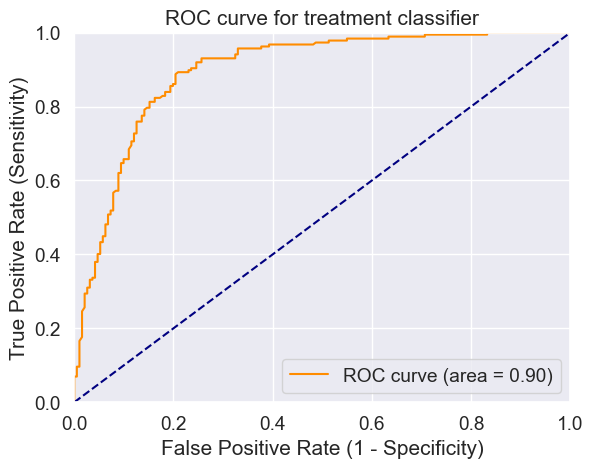

[[132  59]
 [ 13 174]]


In [39]:
def boosting():
    # Building and fitting the model
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    
    # Use `estimator` instead of `base_estimator` and explicitly set algorithm="SAMME"
    boost = AdaBoostClassifier(estimator=clf, n_estimators=500, algorithm="SAMME")
    
    boost.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('-------------- Boosting -----------------')
    
    # Evaluate the model
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, plot=True)

    # Data for final graph
    methodDictionary['Boosting'] = accuracy_score * 100

boosting()

# Model Comparison

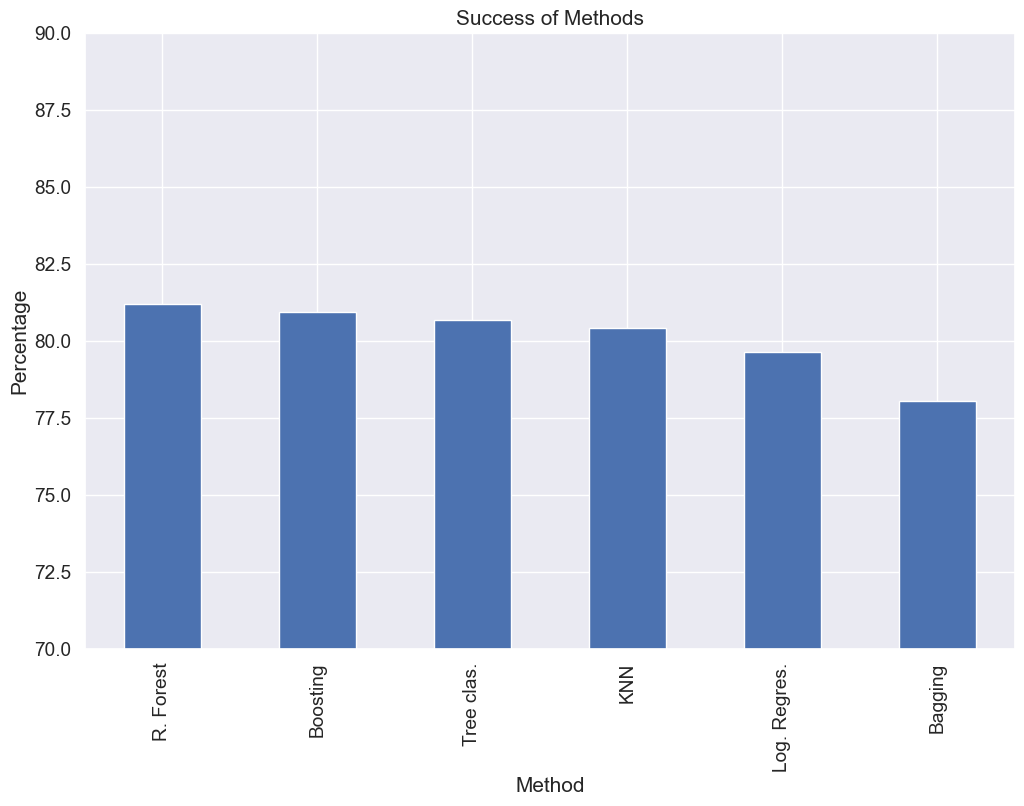

In [40]:
def plotSuccess():
    success = pd.Series(methodDictionary)
    success = success.sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8)) 
    
    # Create bar plot
    ax = success.plot(kind='bar') 
    plt.ylim([70.0, 90.0])  # Set y-axis limits
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of Methods')
    
    plt.show()
    
plotSuccess()